In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
output_file = '../videos/video_1_sim_output.csv'
output_df = pd.read_csv(output_file, delimiter=';', header=[3])

In [90]:
output_df

,Frame,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,145,579.725541,191.736624,546.903568,170.550182,527.453847,187.463548,500.591631,152.957814,474.879927,190.602701,459.814725,165.296471,0.076,False,NaN
1,210,572.516113,266.294333,551.064291,215.692095,536.869276,244.683582,543.806380,196.928524,494.585681,194.112497,502.287791,181.182299,0.212,False,NaN
2,213,590.050083,265.486902,579.734442,244.111118,536.464456,244.087248,542.287879,195.290366,520.437120,232.505779,506.007989,189.158810,0.348,False,NaN
3,216,606.088740,256.137810,582.996198,244.334419,580.693537,260.914340,544.024774,197.575519,519.703508,233.464836,509.595523,202.657731,0.483,False,NaN
4,219,616.184395,255.308091,584.340580,245.630426,579.683912,258.984169,566.626946,217.288696,519.049361,232.281554,519.028010,207.427665,0.618,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1781,5553,579.314267,191.019857,546.481964,170.751144,526.936988,187.516390,500.969797,152.683796,474.404678,190.099772,459.857293,164.788769,320.475,True,InterTrial
1782,5556,580.109233,191.343032,546.139923,170.224580,527.172909,187.279265,500.575675,152.861517,473.698074,189.813606,459.782864,165.029104,320.619,True,InterTrial
1783,5559,580.152870,190.975655,546.224508,169.968414,527.671073,187.406756,501.223482,152.659228,473.482362,189.829148,459.588970,165.175285,320.774,True,InterTrial
1784,5562,580.019262,190.942702,545.390929,170.008790,527.993487,187.492348,500.746469,152.971915,473.813708,189.859373,459.515183,164.886114,320.922,True,InterTrial


### filter only since experiment start

In [93]:
output_pose = np.array([output_df.loc[output_df['Unnamed: 14'] == True].iloc[:, c] for c in np.arange(1, 13)]).T
output_pose

array([[621.27578926, 322.33593976, 622.9247334 , ..., 262.89088488,
        559.99825191, 230.54184198],
       [629.36748791, 318.23717451,          nan, ..., 263.56924295,
        565.7460283 , 230.77460051],
       [631.21805525, 327.13517857, 622.93675113, ..., 265.27958393,
        567.63606691, 235.30652958],
       ...,
       [580.15286998, 190.9756546 , 546.22450805, ..., 189.82914782,
        459.58896974, 165.17528546],
       [580.01926167, 190.94270158, 545.39092946, ..., 189.85937262,
        459.51518336, 164.88611376],
       [569.39041948, 186.25130439, 545.7292335 , ..., 190.06002498,
        457.48000503, 162.67222559]])

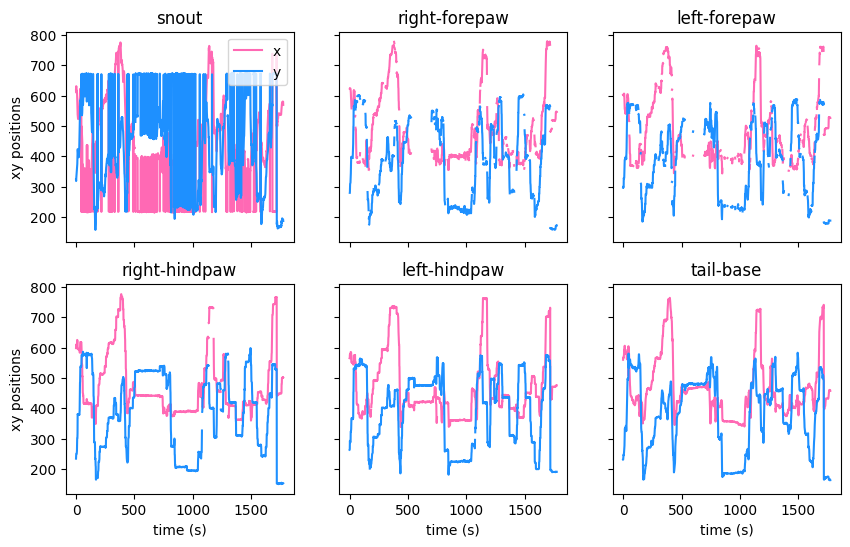

In [94]:
# plot all example files
bodyparts_names = ['snout',
                   'right-forepaw', 'left-forepaw', 
                   'right-hindpaw', 'left-hindpaw', 
                   'tail-base']
cols = 3
rows = int(np.ceil(int(output_pose.shape[1]/2)/cols))
count = 0
fig, ax = plt.subplots(rows, cols, figsize=(10, 6), sharex=True, sharey=True)
for row in range(rows):
    for col in range(cols):
        try:
            ax[row, col].plot(output_pose[:, 2*count], c='hotpink', label='x')
            ax[row, col].plot(output_pose[:, 2*count+1], c='dodgerblue', label='y')
            if col == 0 and row == 0:
                ax[row, col].legend()
            ax[row, col].set_title(bodyparts_names[count])
            if col == 0:
                ax[row, col].set_ylabel('xy positions')

            if row == rows-1:
                ax[row, col].set_xlabel('time (s)')
            count += 1
        except IndexError:
            pass

plt.show()



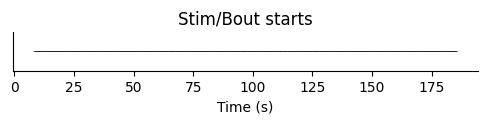

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(6, 0.5))
ax.plot(output_df['Frame'].loc[output_df['Unnamed: 14'] == True]/30,
        np.ones_like(output_df['Frame'].loc[output_df['Unnamed: 14'] == True]/30),
        ls='', marker='|', markersize=0.2, c='k', alpha=1)
ax.set_yticks([])
ax.set_title('Stim/Bout starts')
ax.spines[['right', 'top']].set_visible(False)
ax.set_xlabel('Time (s)')
plt.show()

In [31]:
onset_times = np.load('../processed_data/onset_times.npy')

In [32]:
onset_times

array([[  5.5063324 ],
       [ 10.37359571],
       [ 11.07834077],
       [ 24.54595494],
       [ 25.80758095],
       [ 26.70770502],
       [ 29.58102131],
       [ 34.45055914],
       [ 36.77969241],
       [ 43.61634421],
       [ 46.12221956],
       [ 58.01275253],
       [ 61.77102995],
       [ 68.98609185],
       [ 69.6915009 ],
       [ 74.25853992],
       [ 74.79936886],
       [ 75.31132936],
       [ 76.55790043],
       [ 77.099159  ],
       [ 79.80464816],
       [ 80.88646412],
       [ 81.24685717],
       [ 82.47924876],
       [ 87.51222491],
       [ 90.75294256],
       [128.96767306],
       [132.91482377],
       [134.35600352],
       [135.07510495],
       [138.66151524],
       [139.02135849],
       [141.90899181],
       [144.79158902],
       [187.32403994],
       [194.64782023],
       [196.97985721],
       [197.50335097],
       [200.92834473],
       [204.53650284],
       [205.07594824],
       [212.28463984],
       [216.77431917],
       [223

In [33]:
output_df['Unnamed: 13']

0         0.076
1         0.212
2         0.348
3         0.483
4         0.618
         ...   
1781    320.475
1782    320.619
1783    320.774
1784    320.922
1785    321.087
Name: Unnamed: 13, Length: 1786, dtype: float64

In [50]:
def find_nearest(array, value):
    array = np.asarray(array)
    # print(array)
    idx = (np.abs(array - value)).argmin()
    return idx


In [88]:
real_onsets_ls = []
exp_start_frame = output_df.loc[output_df['Unnamed: 14'] == True]['Frame'].iloc[0]
for onset_time in onset_times:
    closest_idx = find_nearest(output_df['Unnamed: 13'], onset_time)
    # print(closest_idx)
    real_onsets_ls.append(output_df['Frame'][closest_idx]-exp_start_frame)
    

In [89]:
np.array(real_onsets_ls)/30

array([  2.1,   4.8,   5.2,  12.7,  13.4,  13.9,  15.5,  18.2,  19.5,
        23.3,  24.7,  31.3,  33.4,  37.4,  37.8,  40.4,  40.7,  41. ,
        41.7,  42. ,  43.5,  44.1,  44.3,  45. ,  47.8,  49.6,  70.8,
        73. ,  73.8,  74.2,  76.2,  76.4,  78. ,  79.6, 103.2, 107.1,
       108.4, 108.7, 110.6, 112.6, 112.9, 116.9, 119.4, 123. , 125.1,
       126.5, 126.9, 128.7, 129.6, 129.9, 130.2, 135.8, 143.5, 143.9,
       149.1, 149.8, 153.7, 154.2, 157.6, 161.5, 161.7, 162.2, 162.5,
       162.9, 163.1, 163.3, 166.7, 172.3, 175.3, 175.4])

In [38]:
output_df['Unnamed: 13']

0         0.076
1         0.212
2         0.348
3         0.483
4         0.618
         ...   
1781    320.475
1782    320.619
1783    320.774
1784    320.922
1785    321.087
Name: Unnamed: 13, Length: 1786, dtype: float64

In [55]:
onset_times

array([[  5.5063324 ],
       [ 10.37359571],
       [ 11.07834077],
       [ 24.54595494],
       [ 25.80758095],
       [ 26.70770502],
       [ 29.58102131],
       [ 34.45055914],
       [ 36.77969241],
       [ 43.61634421],
       [ 46.12221956],
       [ 58.01275253],
       [ 61.77102995],
       [ 68.98609185],
       [ 69.6915009 ],
       [ 74.25853992],
       [ 74.79936886],
       [ 75.31132936],
       [ 76.55790043],
       [ 77.099159  ],
       [ 79.80464816],
       [ 80.88646412],
       [ 81.24685717],
       [ 82.47924876],
       [ 87.51222491],
       [ 90.75294256],
       [128.96767306],
       [132.91482377],
       [134.35600352],
       [135.07510495],
       [138.66151524],
       [139.02135849],
       [141.90899181],
       [144.79158902],
       [187.32403994],
       [194.64782023],
       [196.97985721],
       [197.50335097],
       [200.92834473],
       [204.53650284],
       [205.07594824],
       [212.28463984],
       [216.77431917],
       [223